# Simulation Study for Biparameter Rank Functions
 
In this simulation study we aim to explore the inferential abilities of rank functions in both the single and bi-parameter setting through hypothesis testing, where we generate samples from the circle of radius two with and without various types of noise.

As outlined in the paper, the following types of noise are introduced to the samples:
- Noise 1: Single outlier at (0,0)
- Noise 2: Gaussian noise with 0.01 variance
- Noise 3: Exponential noise with variance of 0.01
- Noise 4: Power-law noise with shape parameter 3 and scale parameters $\frac{1}{5√3}$ (equivalent to variance = 0.01)
- Noise 5: Combination of a single outlier at (0,0) and Gaussian noise with 0.01 variance
- Noise 6: Noise 5 + a small number of extreme outliers whose radii are uniformly sampled to be between 1.25 and 3 times the normal radius

We carry out randomization style hypothesis testing to determine whether two collections of samples are generated from the same process. The test statistic used is the mean squared error (MSE).

In [1]:
# import packages
import numpy as np
import os
import matplotlib.pyplot as plt
from simulation_tools import (sample_noise, sample_circle, plot_scatter, 
                              PD_randomization_test, Randomization_test, sample_with_Gaussian)
import ripser
from persim import plot_diagrams
from compute_rank_function_from_barcode import rank_function
from rank import rank_function as rank_invariant
from helper_functions import Compute_Rivet
import matplotlib.pyplot as plt
import random

## Generate 100 samples of 100 from each the different types of noise

In [2]:
# sample from the circle
circle_samples = [sample_circle(2,100) for i in range(100)]
# sample with the different noises
noise1_samples = [sample_noise(1) for i in range(100)]
noise2_samples = [sample_noise(2) for i in range(100)]
noise3_samples = [sample_noise(3) for i in range(100)]
noise4_samples = [sample_noise(4) for i in range(100)]
noise5_samples = [sample_noise(5) for i in range(100)]
noise6_samples = [sample_noise(6) for i in range(100)]

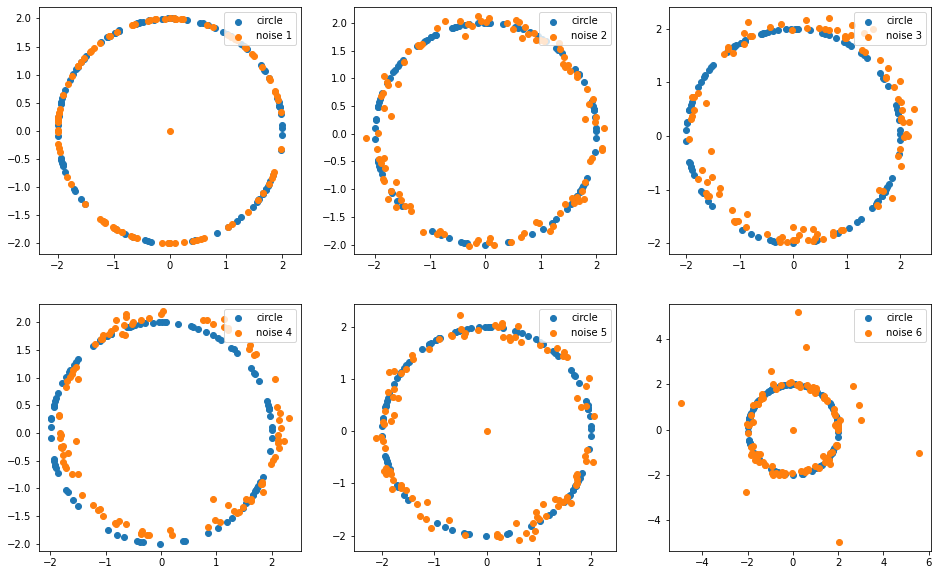

In [3]:
# plot to visualize the sampled noise
plot_scatter(circle_samples[0], noise1_samples[0], noise2_samples[0], noise3_samples[0], noise4_samples[0], noise5_samples[0], noise6_samples[0])

## Compute persistence diagrams for each sample

In [3]:
# compute persistence diagrams using ripser
circle_pds = [ripser.ripser(circle_samples[i], maxdim=2)['dgms'] for i in range(100)]

noise1_pds = [ripser.ripser(noise1_samples[i], maxdim=2)['dgms'] for i in range(100)]
noise2_pds = [ripser.ripser(noise2_samples[i], maxdim=2)['dgms'] for i in range(100)]
noise3_pds = [ripser.ripser(noise3_samples[i], maxdim=2)['dgms'] for i in range(100)]
noise4_pds = [ripser.ripser(noise4_samples[i], maxdim=2)['dgms'] for i in range(100)]
noise5_pds = [ripser.ripser(noise5_samples[i], maxdim=2)['dgms'] for i in range(100)]
noise6_pds = [ripser.ripser(noise6_samples[i], maxdim=2)['dgms'] for i in range(100)]

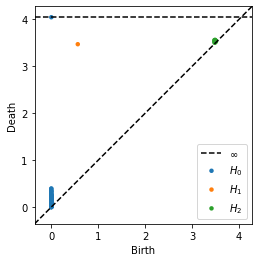

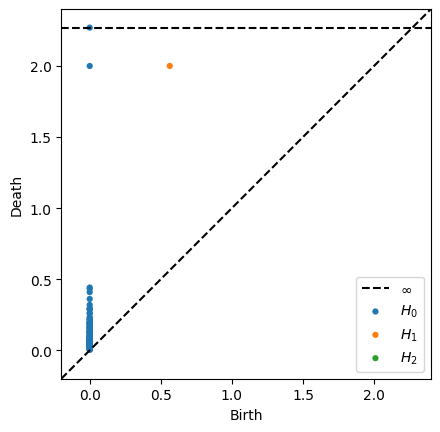

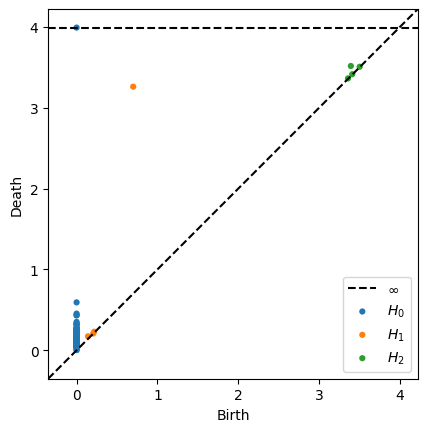

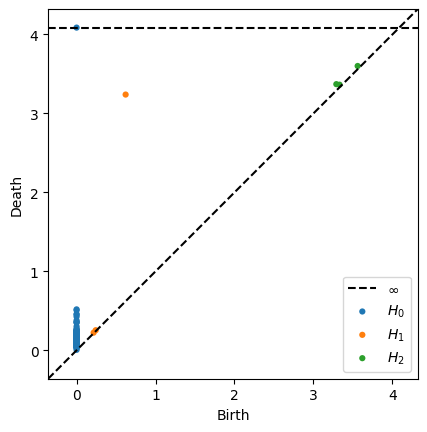

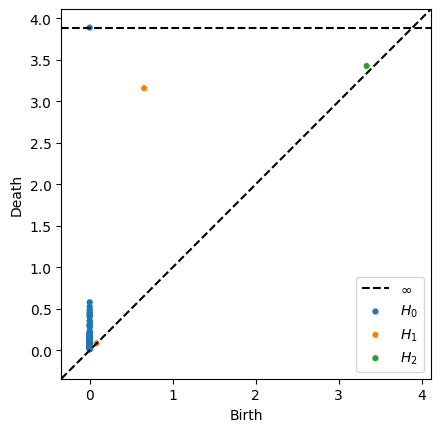

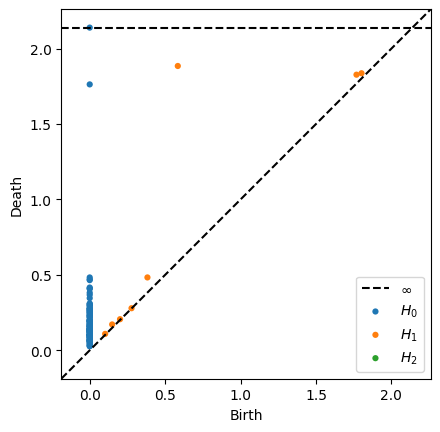

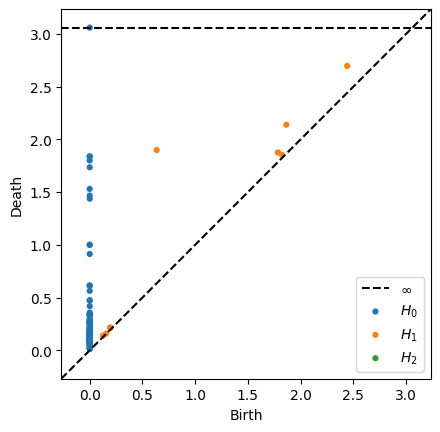

In [5]:
# plot persistence diagrams for each
plot_diagrams(circle_pds[0], show=True)
plot_diagrams(noise1_pds[0], show=True)
plot_diagrams(noise2_pds[0], show=True)
plot_diagrams(noise3_pds[0], show=True)
plot_diagrams(noise4_pds[0], show=True)
plot_diagrams(noise5_pds[0], show=True)
plot_diagrams(noise6_pds[0], show=True)

## Compute rank functions from the persistence diagrams

In [6]:
# compute rank functions from persistence diagrams
# for dim = 0
circle_rank_functions0 = [rank_function(circle_pds[i], 0, 20, [0,4]) for i in range(100)]

noise1_rank_functions0 = [rank_function(noise1_pds[i], 0, 20, [0,4]) for i in range(100)]
noise2_rank_functions0 = [rank_function(noise2_pds[i], 0, 20, [0,4]) for i in range(100)]
noise3_rank_functions0 = [rank_function(noise3_pds[i], 0, 20, [0,4]) for i in range(100)]
noise4_rank_functions0 = [rank_function(noise4_pds[i], 0, 20, [0,4]) for i in range(100)]
noise5_rank_functions0 = [rank_function(noise5_pds[i], 0, 20, [0,4]) for i in range(100)]
noise6_rank_functions0 = [rank_function(noise6_pds[i], 0, 20, [0,4]) for i in range(100)]

# for dim = 1
circle_rank_functions1 = [rank_function(circle_pds[i], 1, 20, [0,4]) for i in range(100)]

noise1_rank_functions1 = [rank_function(noise1_pds[i], 1, 20, [0,4]) for i in range(100)]
noise2_rank_functions1 = [rank_function(noise2_pds[i], 1, 20, [0,4]) for i in range(100)]
noise3_rank_functions1 = [rank_function(noise3_pds[i], 1, 20, [0,4]) for i in range(100)]
noise4_rank_functions1 = [rank_function(noise4_pds[i], 1, 20, [0,4]) for i in range(100)]
noise5_rank_functions1 = [rank_function(noise5_pds[i], 1, 20, [0,4]) for i in range(100)]
noise6_rank_functions1 = [rank_function(noise6_pds[i], 1, 20, [0,4]) for i in range(100)]

# join together the 0-dim and 1-dim rank functions

circle_rank_functions = [circle_rank_functions0[i] + circle_rank_functions1[0] for i in range(100)]

noise1_rank_functions = [noise1_rank_functions0[i] + noise1_rank_functions1[i] for i in range(100)]
noise2_rank_functions = [noise2_rank_functions0[i] + noise2_rank_functions1[i] for i in range(100)]
noise3_rank_functions = [noise3_rank_functions0[i] + noise3_rank_functions1[i] for i in range(100)]
noise4_rank_functions = [noise4_rank_functions0[i] + noise4_rank_functions1[i] for i in range(100)]
noise5_rank_functions = [noise5_rank_functions0[i] + noise5_rank_functions1[i] for i in range(100)]
noise6_rank_functions = [noise6_rank_functions0[i] + noise6_rank_functions1[i] for i in range(100)]

## Compute biparameter rank invariants

In [9]:
# compute rank invariants

circle_rank_invariant = [rank_invariant(Compute_Rivet(circle_samples[i], resolution=50, dim=0, RipsMax=4), grid_size=20, fixed_bounds=None, use_weights=False, normalize=False, minimum_rank=0) for i in range(100)]

noise1_rank_invariant = [rank_invariant(Compute_Rivet(noise1_samples[i], resolution=50, dim=0, RipsMax=4), grid_size=20, fixed_bounds=None, use_weights=False, normalize=False, minimum_rank=0) for i in range(100)]
noise2_rank_invariant = [rank_invariant(Compute_Rivet(noise2_samples[i], resolution=50, dim=0, RipsMax=4), grid_size=20, fixed_bounds=None, use_weights=False, normalize=False, minimum_rank=0) for i in range(100)]
noise3_rank_invariant = [rank_invariant(Compute_Rivet(noise3_samples[i], resolution=50, dim=0, RipsMax=4), grid_size=20, fixed_bounds=None, use_weights=False, normalize=False, minimum_rank=0) for i in range(100)]
noise4_rank_invariant = [rank_invariant(Compute_Rivet(noise4_samples[i], resolution=50, dim=0, RipsMax=4), grid_size=20, fixed_bounds=None, use_weights=False, normalize=False, minimum_rank=0) for i in range(100)]
noise5_rank_invariant = [rank_invariant(Compute_Rivet(noise5_samples[i], resolution=50, dim=0, RipsMax=4), grid_size=20, fixed_bounds=None, use_weights=False, normalize=False, minimum_rank=0) for i in range(100)]
noise6_rank_invariant = [rank_invariant(Compute_Rivet(noise6_samples[i], resolution=50, dim=0, RipsMax=4), grid_size=20, fixed_bounds=None, use_weights=False, normalize=False, minimum_rank=0) for i in range(100)]


## Carry out hypothesis testing over persistence diagrams $(D,d_B)$


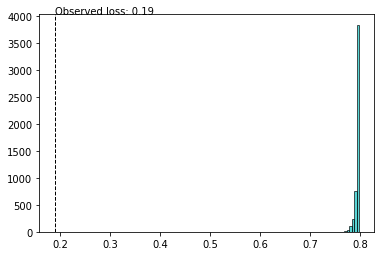

p-value for re-randomization tests between circle samples and samples with type 1 noise: 0.0001999600079984003


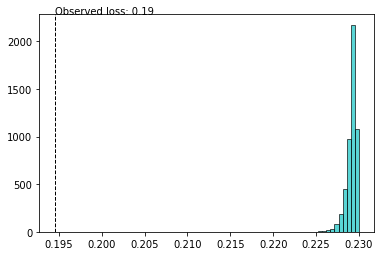

p-value for re-randomization tests between circle samples and samples with type 2 noise: 0.0001999600079984003


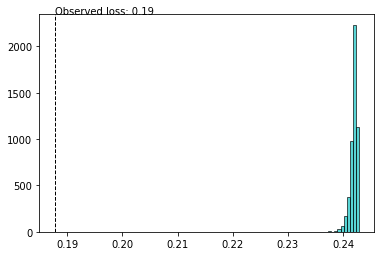

p-value for re-randomization tests between circle samples and samples with type 3 noise: 0.0001999600079984003


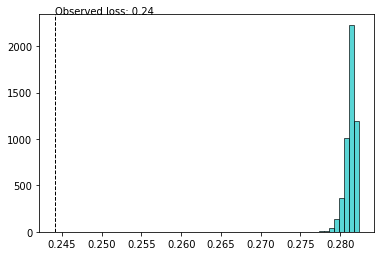

p-value for re-randomization tests between circle samples and samples with type 4 noise: 0.0001999600079984003


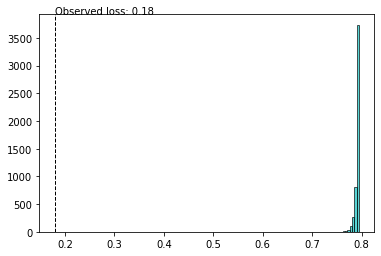

p-value for re-randomization tests between circle samples and samples with type 5 noise: 0.0001999600079984003


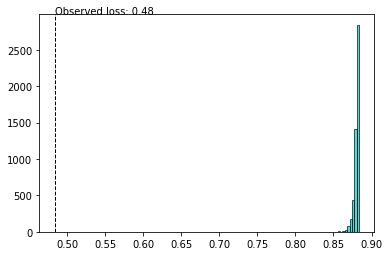

p-value for re-randomization tests between circle samples and samples with type 6 noise: 0.0001999600079984003


In [5]:
p1 = PD_randomization_test(circle_pds, noise1_pds, 5000, plot=True)
print("p-value for re-randomization tests between circle samples and samples with type 1 noise: " + str(p1))

p2 = PD_randomization_test(circle_pds, noise2_pds, 5000, plot=True)
print("p-value for re-randomization tests between circle samples and samples with type 2 noise: " + str(p2))

p3 = PD_randomization_test(circle_pds, noise3_pds, 5000, plot=True)
print("p-value for re-randomization tests between circle samples and samples with type 3 noise: " + str(p3))

p4 = PD_randomization_test(circle_pds, noise4_pds, 5000, plot=True)
print("p-value for re-randomization tests between circle samples and samples with type 4 noise: " + str(p4))

p5 = PD_randomization_test(circle_pds, noise5_pds, 5000, plot=True)
print("p-value for re-randomization tests between circle samples and samples with type 5 noise: " + str(p5))

p6 = PD_randomization_test(circle_pds, noise6_pds, 5000, plot=True)
print("p-value for re-randomization tests between circle samples and samples with type 6 noise: " + str(p6))

## Carry out hypothesis testing over rank functions $(\mathcal{I}_1,L^2)$

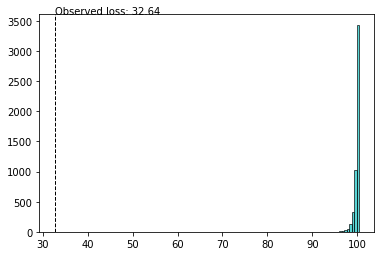

p-value for re-randomization tests between circle samples and samples with type 1 noise: 0.0001999600079984003


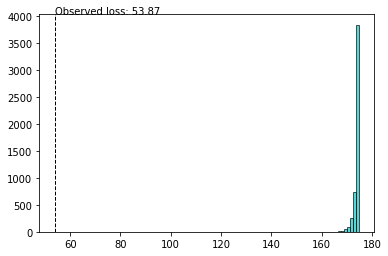

p-value for re-randomization tests between circle samples and samples with type 2 noise: 0.0001999600079984003


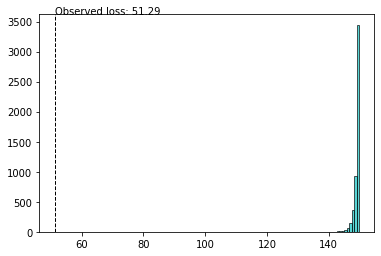

p-value for re-randomization tests between circle samples and samples with type 3 noise: 0.0001999600079984003


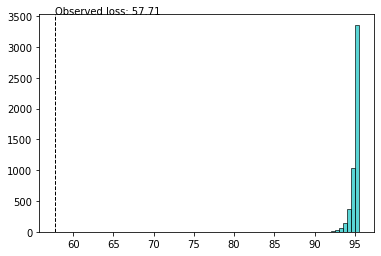

p-value for re-randomization tests between circle samples and samples with type 4 noise: 0.0001999600079984003


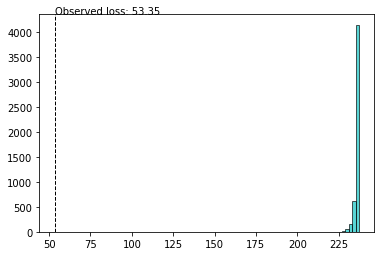

p-value for re-randomization tests between circle samples and samples with type 5 noise: 0.0001999600079984003


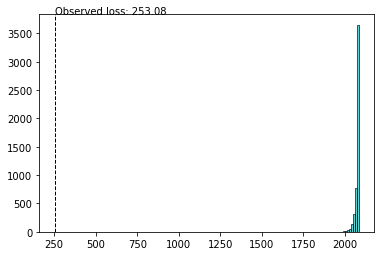

p-value for re-randomization tests between circle samples and samples with type 6 noise: 0.0001999600079984003


In [7]:
q1 = Randomization_test(circle_rank_functions, noise1_rank_functions, 5000, plot=True)
print("p-value for re-randomization tests between circle samples and samples with type 1 noise: " + str(q1))

q2 = Randomization_test(circle_rank_functions, noise2_rank_functions, 5000, plot=True)
print("p-value for re-randomization tests between circle samples and samples with type 2 noise: " + str(q2))

q3 = Randomization_test(circle_rank_functions, noise3_rank_functions, 5000, plot=True)
print("p-value for re-randomization tests between circle samples and samples with type 3 noise: " + str(q3))

q4 = Randomization_test(circle_rank_functions, noise4_rank_functions, 5000, plot=True)
print("p-value for re-randomization tests between circle samples and samples with type 4 noise: " + str(q4))

q5 = Randomization_test(circle_rank_functions, noise5_rank_functions, 5000, plot=True)
print("p-value for re-randomization tests between circle samples and samples with type 5 noise: " + str(q5))

q6 = Randomization_test(circle_rank_functions, noise6_rank_functions, 5000, plot=True)
print("p-value for re-randomization tests between circle samples and samples with type 6 noise: " + str(q6))


## Carry out hypothesis testing over rank functions $(\mathcal{I}_2,L^2)$

In [ ]:
r1 = Randomization_test(circle_rank_invariant, noise1_rank_invariant, 5000, plot=True)
print("p-value for re-randomization tests between circle samples and samples with type 1 noise: " + str(r1))

r2 = Randomization_test(circle_rank_invariant, noise2_rank_invariant, 5000, plot=True)
print("p-value for re-randomization tests between circle samples and samples with type 2 noise: " + str(r2))

r3 = Randomization_test(circle_rank_invariant, noise3_rank_invariant, 5000, plot=True)
print("p-value for re-randomization tests between circle samples and samples with type 3 noise: " + str(r3))

r4 = Randomization_test(circle_rank_invariant, noise4_rank_invariant, 5000, plot=True)
print("p-value for re-randomization tests between circle samples and samples with type 4 noise: " + str(r4))

r5 = Randomization_test(circle_rank_invariant, noise5_rank_invariant, 5000, plot=True)
print("p-value for re-randomization tests between circle samples and samples with type 5 noise: " + str(r5))

r6 = Randomization_test(circle_rank_invariant, noise6_rank_invariant, 5000, plot=True)
print("p-value for re-randomization tests between circle samples and samples with type 6 noise: " + str(r6))


## Explore how p-value of the re-randomization test changes with increasing amounts of Gaussian noise for the different combination of representations and metrics $(D,d_B),\, (D,W_2),\,(\mathcal{I}_1,L^2),\,(\mathcal{I}_2,L^2)$

In [ ]:
noises = np.linspace(0,0.25, 26)
bottleneck_pvals = [0 for i in range(26)]
wasserstein_pvals = [0 for i in range(26)]
rank_function_pvals = [0 for i in range(26)]
rank_invariant_pvals = [0 for i in range(26)]
bottleneck_pvals_vars = [0 for i in range(26)]
wasserstein_pvals_vars = [0 for i in range(26)]
rank_function_pvals_vars = [0 for i in range(26)]
rank_invariant_pvals_vars = [0 for i in range(26)]
for i in range(26):
    # for each i sample 100 each from circle and noisy circle with different variance
    circle_samples = [sample_circle(2,100) for j in range(100)]        
    noisy_circle_samples = [sample_with_Gaussian(2,100,noises[i]) for j in range(100)]
        
    # compute the PD
    circle_samples_PD = [ripser.ripser(circle_samples[k], maxdim=2)['dgms'] for k in range(100)]
    noisy_circle_samples_PD = [ripser.ripser(noisy_circle_samples[k], maxdim=2)['dgms'] for k in range(100)]
    
    bottleneck_pvals[i], bottleneck_pvals_vars[i] = PD_randomization_test(circle_samples_PD,noisy_circle_samples_PD, 5000, dist_type="bottleneck", plot=False)
    wasserstein_pvals[i], wasserstein_pvals_vars[i] = PD_randomization_test(circle_samples_PD,noisy_circle_samples_PD, 5000, dist_type="wasserstein", plot=False)
    
    # compute rank functions
    circle_samples_rank_fns = [rank_function(circle_samples_PD[l], 0, 20, [0,5]) + rank_function(circle_samples_PD[l], 1, 20, [0,5]) for l in range(100)]
    noisy_circle_samples_rank_fns = [rank_function(noisy_circle_samples_PD[l], 0, 20, [0,5]) + rank_function(noisy_circle_samples_PD[l], 1, 20, [0,5]) for l in range(100)]
    
    rank_function_pvals[i], rank_function_pvals_vars[i] = Randomization_test(circle_samples_rank_fns,noisy_circle_samples_rank_fns, 5000, plot=False)
    
    
    # compute 2 parameter rank functions
    circle_samples_ranks = [0 for p in range(100)]
    noisy_circle_samples_ranks = [0 for p in range(100)]
    
    for p in range(100):
        current = Compute_Rivet(circle_samples[p], resolution=50, dim=0, RipsMax=5)
        circle_samples_ranks[p] = rank_invariant(current, grid_size=20, fixed_bounds=None, use_weights=False, normalize=False, minimum_rank=0)
    
        current = Compute_Rivet(noisy_circle_samples[p], resolution=50, dim=0, RipsMax=5)
        noisy_circle_samples_ranks[p] = rank_invariant(current, grid_size=20, fixed_bounds=None, use_weights=False, normalize=False, minimum_rank=0)
        
    rank_invariant_pvals[i], rank_invariant_pvals_vars[i] = Randomization_test(circle_samples_ranks, noisy_circle_samples_ranks, 5000, plot=False)
    